支持向量机
===

# 1.问题引入
![images](Images/08_001.png)

上图中的(a)是已有的数据，红色和蓝色分别代表两个不同的类别。数据显然是线性可分的，但是将两类数据点分开的直线显
然不止一条。上图的(b)和(c)分别给出了B、C两种不同的分类方案，其中黑色实线为分界线，术语称为“决策面”。每个决策
面对应了一个线性分类器。虽然从分类结果上看，分类器A和分类器B的效果是相同的。但是他们的性能是有差距的，看下
图：

![images](Images/08_002.png)

在"决策面"不变的情况下，我又添加了一个红点。可以看到，分类器B依然能很好的分类结果，而分类器C则出现了分类错误。显然分类器B的"决策面"放置的位置优于分类器C的"决策面"放置的位置。每幅图中的两条虚线中间的距离，我们叫做$D$，使得这个$D$最大的两个虚面，我们叫做"支撑平面"，图中的实线，叫做分割面。在支撑平面上的样本点，叫做支撑向量

# 2.数学建模
## 2.1.空间中的点、线、面
假设空间中存在一个点$(x_0,y_0)$，以及一条直线$f(x,y)=Ax+By+C$，那么我们知道这个点到这条直线的距离就是
$$D=\frac{|Ax_0+By_0+C|}{\sqrt{A^2+B^2}}$$
如果$Ax_0+By_0+C > 0$，说明$(x_0,y_0)$位于法向$(A,B)$的正向，反之位于负向，扩展到多维向量，点到直线的距离是
$$\alpha(x_0,L)=\frac{\overrightarrow{\omega} \bullet \overrightarrow{x} + C}{||\omega||}$$
那么对于平面来说呢，我们知道空间中的平面方程为
$$\omega^Tx+b=0$$
其中$\omega$是平面的法向量

## 2.2.分割面与支撑平面方程
对于二分类问题，我们对每个样本点$x_i$加上一个类别标签$y_i$,则有
$$
y_i=\begin{cases}
+1 & red \\
-1 & blue
\end{cases}
$$
对于分割面来说，它的方程就是
$$\omega^Tx+b=0$$
对于两个分割面来说，它们的方程就是
$$
\begin{cases}
\omega^Tx+b>=1 & \forall y_i = 1\\\\
\omega^Tx+b<=-1 & \forall y_i =-1
\end{cases}
$$
由于我们假定$|y_i|=1$，那么就有$y_i(\omega^Tx_i+b)>=1,\forall x_i$，等于1的时候，那就是支撑平面上的点，我们要计算的是支撑平面距离最大的情况，支撑平面的距离就是$D=\frac{2}{||\omega||}$,也就是我们的目标函数是
$$argmax(D)=argmax(\frac{2}{||\omega||})=argmin(\frac{||\omega||}{2})$$
我们知道，$\omega=\sqrt{\sum_{i=1}^mx_i^2}$，那么其实上述问题的目标函数可以变为
$$argmin(\frac{||\omega||^2}{2})$$

## 2.3.问题给出
- 假设给定一个特征空间上的训练数据集$T=\{(x_1,y_1),(x_2,y_2),...,(x_N,y_N)\}$，其中$x_i \in R^n, y_i \in \{-1,+1\},i=1,2,...,N$
- $x_i$为第i个实例(若n>1,$x_i$为向量)
- $y_i$为$x_i$的类标记；当$y_i=+1$时，称$x_i$为正例；当$y_i=-1$时，称$x_i$为负例
- $(x_i,y_i)$称为样本点
- 要把所有样本都分开，其次你要在所有这些可以把样本都分开的线里面找到一个距离样本最远的直线

## 2.4.目标与约束
$$
\begin{eqnarray}
& &min\frac{1}{2}||\omega||^2 \\
s.t.& &y_i(\omega^Tx_i+b) \geq 1,i=1,2,...,n
\end{eqnarray}
$$
我们一看这就是个凸优化问题，那么必然会用到拉格朗日乘子法

## 2.5.问题转化
约束可以转化为
$$1-y(\omega^Tx+b)\leq 0$$
加入拉格朗日因子$\alpha$,变化为
$$-\alpha(y(w^Tx+b)-1)\leq 0$$
那么拉格朗日函数就是
$$L(\omega,b,\alpha)=\frac{1}{2}||\omega||^2-\alpha(y(\omega^Tx+b)-1)=\frac{1}{2}||\omega||^2-\sum_{i=1}^n\alpha_i(y_i(\omega^Tx_i+b)-1)$$
其中$x_i$就是第i个样本,$y_i$就是第i个样本对应的分类,$\alpha_i$就是第i个样本对应的拉格朗日乘子,$\alpha_i\geq 0$，那么我们我们要求的是一个极小极大问题
$$min_{\omega,b}\theta(\omega)=min_{\omega,b}max_{\alpha_i\geq 0}L(\omega,b,\alpha)=p^*$$
然后我们找到此问题的拉格朗日对偶函数
$$max_{\alpha_i\geq 0}min_{\omega,b}L(\omega,b,\alpha)=d^*$$
我们知道$d^* \leq p^*$，我们关心的是$d^*=p^*$的情况，那么什么情况下等式成立呢，我们知道那就是要用到的KKT条件

## 2.6.问题符合KKT条件
由于有
$$
\begin{eqnarray}
min_{\omega,b}max_{\alpha_i}L(\omega,b,\alpha)&=&min\frac{1}{2}||\omega||^2\\
L(\omega,b,\alpha)&=&\frac{1}{2}||\omega||^2-\sum_{i=1}^n\alpha_i(y_i(\omega^Tx_i+b)-1),\alpha_i\geq 0,y_i(\omega^Tx_i+b)\geq 1
\end{eqnarray}
$$
因此只有每一个$\alpha_i(y_i(\omega^Tx_i+b)-1)$都是0，结果才能为0从而达到才能取得最大值。这样我们就能得到KKT条件:
$$
\begin{cases}
\alpha_i\geq 0 \\\\
y_i(\omega^Tx_i+b)-1\geq 0 \\\\
\alpha_i(y_i(\omega^Tx_i+b)-1)=0
\end{cases}
$$
根据KKT条件3，我们可以得出这样一个结论$\alpha_i=0$或者$y_i(\omega^Tx_i+b)=1$.所以如果一个样本是支持向量，则其对应的拉格朗日系数非零；如果一个样本不是支持向量，则其对应的拉格朗日系数一定为0。也就是说我们要找的支撑平面只跟支撑向量有关

## 2.7.对偶问题求解
对于$L(\omega,b,\alpha)$,可以对$\omega，b$求偏导数，令其结果为0，消掉$\omega,b$然后在对$\alpha$求L的最大值。有：
$$
\begin{eqnarray}
\frac{\partial{L}}{\partial{\omega}}&=0\\
&\Rightarrow& \frac{1}{2}*2||\omega||-\sum_{i=1}^n\alpha_iy_ix_i=0\\
&\Rightarrow& \omega=\sum_{i=1}^n\alpha_iy_ix_i\\
\frac{\partial{L}}{\partial{b}}&=&0\\
&\Rightarrow& \sum_{i=1}^n\alpha_iy_i=0
\end{eqnarray}
$$

这是两个非常重要的等式，然后我们展开原来的式子:
$$
\begin{eqnarray}
L(\omega,b,\alpha)&=&\frac{1}{2}||\omega||^2-\sum_{i=1}^n\alpha_i(y_i(\omega^Tx_i+b)-1)\\
&=&\frac{1}{2}\omega^T \bullet \omega-\sum_{i=1}^n\alpha_iy_i\omega^Tx_i-\sum_{i=1}^n\alpha_iy_ib+\sum_{i=1}^n\alpha_i\\
&=&\frac{1}{2}\omega^T \bullet \omega-\omega^T\sum_{i=1}^n\alpha_iy_ix_i-b\sum_{i=1}^n\alpha_iy_i+\sum_{i=1}^n\alpha_i\\
&\Rightarrow& \frac{1}{2}\omega^T\sum_{i=1}^n\alpha_iy_ix_i-\omega^T\sum_{i=1}^n\alpha_iy_ix_i-b \bullet 0+\sum_{i=1}^n\alpha_i\\
&=&\sum_{i=1}^n\alpha_i-\frac{1}{2}\omega^T\sum_{i=1}^n\alpha_iy_ix_i\\\ \
&\Rightarrow& \sum_{i=1}^n\alpha_i-\frac{1}{2}[\sum_{i=1}^n\alpha_iy_ix_i]^T\sum_{i=1}^n\alpha_iy_ix_i\\\ \
&=&\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j
\end{eqnarray}
$$

其中$\alpha_i\geq 0$,于是我们把
$$max_{\alpha_i\geq 0}min_{\omega,b}L(\omega,b,\alpha)=d^*$$
变为了
$$
\begin{eqnarray}
& &max_{\alpha_i}[\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j]\\
s.t. & &\alpha_i \geq 0, i=1,2,...,n\\\ \
& &\sum_{i=1}^n\alpha_iy_i=0
\end{eqnarray}
$$
可以变为
$$
\begin{eqnarray}
& &min_{\alpha_i}[\frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j-\sum_{i=1}^n\alpha_i]\\\ \
s.t. & &\alpha_i \geq 0, i=1,2,...,n\\\ \
& &\sum_{i=1}^n\alpha_iy_i=0
\end{eqnarray}
$$
实际上，对于上述目标函数，是存在一个假设的，即数据100%线性可分。但是，目前为止，我们知道几乎所有数据都不那么"干净"。这时我们就可以通过引入所谓的松弛变量(slack variable)，来允许有些数据点可以处于超平面的错误的一侧。所以就变为了
$$
\begin{eqnarray}
& &min_{\alpha_i}[\frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j-\sum_{i=1}^n\alpha_i]\\\ \
s.t. & &0 \leq \alpha_i \leq C, i=1,2,...,n\\\ \
& &\sum_{i=1}^n\alpha_iy_i=0
\end{eqnarray}
$$

# 3.SMO算法
根据KKT条件可以得出其中$\alpha_i$取值的意义为
$$
\begin{cases}
\alpha_i=0 \Leftrightarrow y_i\mu_i \geq 1 \\\\
0 \leq \alpha_i \leq C \Leftrightarrow y_i\mu_i = 1 \\\\
\alpha_i = C \Leftrightarrow \leq 1
\end{cases}
$$
其中$\mu=\omega^Tx+b$
- 对于第1种情况，表明$\alpha_i$是正常分类，在边界内部；
- 对于第2种情况，表明$\alpha_i$是支持向量，在边界上；
- 对于第3种情况，表明$\alpha_i$是在两条边界之间。

而最优解需要满足KKT条件，即上述3个条件都得满足,也就是说，如果存在不能满足KKT条件的$\alpha_i$，那么需要更新这些$\alpha_i$，这是第一个约束条件,此外，更新的同时还要受到第二个约束条件的限制，即
$$\sum_{i=1}^n\alpha_iy_i=0$$
因为这个条件，我们同时更新两个$\alpha$值，因为只有成对更新，才能保证更新之后的值仍然满足和为0的约束，假设我们选择的两个乘子为个$\alpha_1$和个$\alpha_2$
$$\alpha_1^{new}y_1+\alpha_2^{new}y_2=\alpha_1^{old}y_1+\alpha_2^{old}y_2=\zeta$$
由于两个因子不好同时求解，我们可以先求第二个因子$\alpha_2^{new}$的解，然后再用$\alpha_2^{new}$的解表示$\alpha_1^{new}$的解。

## 3.1.$\alpha_2^{new}$的解
为了求出$\alpha_2^{new}$的解，我们需要先确定$\alpha_2^{new}$的范围。假设它的上下边界分别为H和L，那么有
$$L \leq \alpha_2^{new} \leq H$$
同时考虑
$$
\begin{cases}
0 \leq \alpha_i \leq C & i=1,2,...,n\\\\
\alpha_1^{new}y_1+\alpha_2^{new}y_2=\alpha_1^{old}y_1+\alpha_2^{old}y_2=\zeta
\end{cases}
$$

## 3.1.1.$y_1 \neq y_2$
即一个为正1，一个为负1的时候，可以得到
$$\alpha_1^{old}-\alpha_2^{old}=\zeta$$
所以有
$$
\begin{cases}
L=max(0, -\zeta)\\\\
H=min(C,C-\zeta)
\end{cases}
$$
此时，取值范围如下图所示

![images](Images/08_003.png)

## 3.1.2.$y_1 = y_2$
即两个都为正1或者都为负1，可以得到
$$\alpha_1^{old}+\alpha_2^{old}=\zeta$$
所以有
$$
\begin{cases}
L=max(0, \zeta-C)\\\\
H=min(C,\zeta)
\end{cases}
$$
此时，取值范围如下图所示

![images](Images/08_004.png)

## 3.1.3.结论
如此，根据$y_1$和$y_2$异号或同号，可以得出$\alpha_2^{new}$的上下界分别为：
$$
\begin{cases}
L=max(0,\alpha_2^{old}-\alpha_1^{old}),H=min(C,C+\alpha_2^{old}-\alpha_1^{old}), y_1 \neq y_2\\\\
L=max(0,\alpha_2^{old}+\alpha_1^{old}-C),H=min(C,\alpha_2^{old}+\alpha_1^{old}), y_1 = y_2
\end{cases}
$$

## 3.2.更新$\alpha$的值
现在需要更新$\alpha$值。我们依然假设选择的两个乘子为$\alpha_1$和$\alpha_2$。固定这两个乘子，进行推导。于是目标函数变成了
$$
\begin{eqnarray}
W(\alpha_2)&=&\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j\\
&=&\alpha_1+\alpha_2+\sum_{i=3}^n\alpha_i-\frac{1}{2}\sum_{i=1}^n(\sum_{j=1}^2\alpha_i\alpha_jy_iy_jx_i^Tx_j+\sum_{j=3}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j)\\
&=&\alpha_1+\alpha_2+\sum_{i=3}^n\alpha_i-\frac{1}{2}\sum_{i=1}^2(\sum_{j=1}^2\alpha_i\alpha_jy_iy_jx_i^Tx_j+\sum_{j=3}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j)-\frac{1}{2}\sum_{i=3}^n(\sum_{j=1}^2\alpha_i\alpha_jy_iy_jx_i^Tx_j+\sum_{j=3}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j)\\
&=&\alpha_1+\alpha_2+\sum_{i=3}^n\alpha_i-\frac{1}{2}\sum_{i=1}^2\sum_{j=1}^2\alpha_i\alpha_jy_iy_jx_i^Tx_j-\frac{1}{2}\sum_{i=1}^2\sum_{j=3}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j-\frac{1}{2}\sum_{i=3}^n\sum_{j=1}^2\alpha_i\alpha_jy_iy_jx_i^Tx_j-\frac{1}{2}\sum_{i=3}^n\sum_{j=3}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j\\
&=&\alpha_1+\alpha_2+\sum_{i=3}^n\alpha_i-\frac{1}{2}\sum_{i=1}^2\sum_{j=1}^2\alpha_i\alpha_jy_iy_jx_i^Tx_j-\sum_{i=1}^2\sum_{j=3}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j-\frac{1}{2}\sum_{i=3}^n\sum_{j=3}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j\\
\end{eqnarray}
$$

对于这个式子，我们需要好好整理一下
$$
\begin{eqnarray}
\frac{1}{2}\sum_{i=1}^2\sum_{j=1}^2\alpha_i\alpha_jy_iy_jx_i^Tx_j&=&\frac{1}{2}\alpha_1\alpha_1y_1y_1x_1^Tx_1+\frac{1}{2}\alpha_1\alpha_2y_1y_2x_1^Tx_2+\frac{1}{2}\alpha_2\alpha_1y_2y_1x_2^Tx_1+\frac{1}{2}\alpha_2\alpha_2y_2y_2x_2^Tx_2\\
\end{eqnarray}
$$
同时我们知道$y_i \in \{-1,+1\}$,所以有$y_1y_1=1,y_2y_2=1$,所以上面的式子可以变为
$$
\begin{eqnarray}
\frac{1}{2}\sum_{i=1}^2\sum_{j=1}^2\alpha_i\alpha_jy_iy_jx_i^Tx_j&=&\frac{1}{2}\alpha_1\alpha_1y_1y_1x_1^Tx_1+\frac{1}{2}\alpha_1\alpha_2y_1y_2x_1^Tx_2+\frac{1}{2}\alpha_2\alpha_1y_2y_1x_2^Tx_1+\frac{1}{2}\alpha_2\alpha_2y_2y_2x_2^Tx_2\\
&=&\frac{1}{2}\alpha_1^2x_1^Tx_1+\frac{1}{2}\alpha_1\alpha_2y_1y_2x_1^Tx_2+\frac{1}{2}\alpha_2\alpha_1y_2y_1x_2^Tx_1+\frac{1}{2}\alpha_2^2x_2^Tx_2\\
&=&\frac{1}{2}\alpha_1^2x_1^Tx_1+\alpha_1\alpha_2y_1y_2x_1^Tx_2+\frac{1}{2}\alpha_2^2x_2^Tx_2
\end{eqnarray}
$$
对于
$$\sum_{i=1}^2\sum_{j=3}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j$$
可以展开$i$
$$\sum_{i=1}^2\sum_{j=3}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j=y_1\alpha_1\sum_{j=3}^n\alpha_jy_jx_1^Tx_j+y_2\alpha_2\sum_{j=3}^n\alpha_jy_jx_2^Tx_j$$

因此，上面的大式子可以转化为
$$
\begin{eqnarray}
&\alpha_1&+\alpha_2-(\frac{1}{2}\alpha_1^2x_1^Tx_1+\alpha_1\alpha_2y_1y_2x_1^Tx_2+\frac{1}{2}\alpha_2^2x_2^Tx_2)-(y_1\alpha_1\sum_{j=3}^n\alpha_jy_jx_1^Tx_j+y_2\alpha_2\sum_{j=3}^n\alpha_jy_jx_2^Tx_j)+\sum_{i=3}^n\alpha_i-\frac{1}{2}\sum_{i=3}^n\sum_{j=3}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j\\
&\alpha_1&+\alpha_2-\frac{1}{2}\alpha_1^2x_1^Tx_1-\alpha_1\alpha_2y_1y_2x_1^Tx_2-\frac{1}{2}\alpha_2^2x_2^Tx_2-y_1\alpha_1\sum_{j=3}^n\alpha_jy_jx_1^Tx_j-y_2\alpha_2\sum_{j=3}^n\alpha_jy_jx_2^Tx_j+\sum_{i=3}^n\alpha_i-\frac{1}{2}\sum_{i=3}^n\sum_{j=3}^n\alpha_i\alpha_jy_iy_jx_i^Tx_j
\end{eqnarray}
$$
为了描述方便，我们定义
$$
\begin{eqnarray}
f(x_i)&=&\sum_{j=1}^n\alpha_jy_jx_i^Tx_j+b\\
\nu_i&=&\sum_{j=3}^n\alpha_jy_jx_i^Tx_j=f(x_i)-\sum_{j=2}^n\alpha_jy_jx_i^Tx_j+b
\end{eqnarray}
$$
那么我们的目标函数就变为
$$W(\alpha_2)=\alpha_1+\alpha_2-\frac{1}{2}\alpha_1^2x_1^Tx_1-\frac{1}{2}\alpha_2^2x_2^Tx_2-y_1y_2\alpha_1\alpha_2x_1^Tx_2-y_1\alpha_1\nu_1-y_2\alpha_2\nu_2+constant$$
我们不关心constant的部分，因为对于$\alpha_1$和$\alpha_2$来说，它们都是常数项，在求导的时候，直接变为0。对于这个目标函数，如果对其求导，还有个未知数$\alpha_1$，所以要推导出$\alpha_1$和$\alpha_2$的关系，然后用$\alpha_2$代替$\alpha_1$，这样目标函数就剩一个未知数了，我们就可以求导了，推导出迭代公式。所以现在继续推导$\alpha_1$和$\alpha_2$的关系

### 3.2.1.$\alpha_1$与$\alpha_2$的关系
我们知道有约束$\sum_{i=1}^n\alpha_iy_i=0$,那么我们展开$i=1$和$i=2$的情况，就有
$$\alpha_1y_1+\alpha_2y_2+\sum_{i=3}^n\alpha_iy_i=0$$
对于第三项，我们不关心，因为不包含$\alpha_1$和$\alpha_2$，我们令其为常数B，就有$\alpha_1y_1+\alpha_2y_2=B$，由于$y_1y_1=1$，我们令等式两边同时乘以$y_1$,就有
$$
\begin{eqnarray}
&\alpha_1&y_1+\alpha_2y_2=B\\
&\Rightarrow& \alpha_1y_1y_1+\alpha_2y_2y_1=By_1\\
&\Rightarrow& \alpha_1=By_1-\alpha_2y_1y_2
\end{eqnarray}
$$
其中$By_1$为常数项，我们不关心，令其为$\gamma$,令$s=y_1y_2$，则上式变为$\alpha_1=\gamma-s\alpha_2$，带入$W(\alpha2)$，有
$$
\begin{eqnarray}
W(\alpha_2)&=&\gamma-s\alpha_2+\alpha_2-\frac{1}{2}(\gamma-s\alpha_2)^2x_1^Tx_1-\frac{1}{2}\alpha_2^2x_2^Tx_2-s(\gamma-s\alpha_2)\alpha_2x_1^Tx_2-y_1(\gamma-s\alpha_2)\nu_1-y_2\alpha_2\nu_2+constant\\
&=&\gamma+(1-s)\alpha_2-\frac{1}{2}(\gamma^2-2\gamma\alpha_2s+s^2\alpha_2^2)x_1^Tx_1-\frac{1}{2}\alpha_2^2x_2^Tx_2-s\gamma\alpha_2x_1^Tx_2+s^2\alpha_2^2x_1^Tx_2-y_1\gamma\nu_1+y_1s\alpha_2\nu_1-y_2\alpha_2\nu_2+C\\
&=&\gamma+(1-s)\alpha_2-\frac{1}{2}\gamma^2x_1^Tx_1+\gamma\alpha_2sx_1^Tx_1-\frac{1}{2}s^2\alpha_2^2x_1^Tx_1-\frac{1}{2}\alpha_2^2x_2^Tx_2-s\gamma\alpha_2x_1^Tx_2+s^2\alpha_2^2x_1^Tx_2-y_1\gamma\nu_1+y_1s\alpha_2\nu_1-y_2\alpha_2\nu_2+C\\
&=&(s^2x_1^Tx_2-\frac{1}{2}s^2x_1^Tx_1-\frac{1}{2}x_2^Tx_2)\alpha_2^2+(1-s+sx_1^Tx_1\gamma-sx_1^Tx_2\gamma+y_1s\nu_1-y_2\nu_2)\alpha_2+\gamma-\frac{1}{2}\gamma^2x_1^Tx_1-y_1\gamma\nu_1+C
\end{eqnarray}
$$

对$\alpha_2$求导，令其为0，则有
$$
\begin{eqnarray}
\frac{\partial{W(\alpha_2)}}{\partial{\alpha_2}}&=&2(s^2x_1^Tx_2-\frac{1}{2}s^2x_1^Tx_1-\frac{1}{2}x_2^Tx_2)\alpha_2+(1-s+sx_1^Tx_1\gamma-sx_1^Tx_2\gamma+y_1s\nu_1-y_2\nu_2)=0\\
&\Rightarrow& \alpha_2 = \frac{-(1-s+sx_1^Tx_1\gamma-sx_1^Tx_2\gamma+y_1s\nu_1-y_2\nu_2)}{2(s^2x_1^Tx_2-\frac{1}{2}s^2x_1^Tx_1-\frac{1}{2}x_2^Tx_2)}
\end{eqnarray}
$$
由于$s=y_1y_2$，所以$s_2^2=1$，则有
$$
\begin{eqnarray}
\alpha_2&=&\frac{-(1-y_1y_2+x_1^Tx_1y_1y_2\gamma-y_1y_2x_1^Tx_2\gamma+y_1y_1y_2\nu_1-y_2\nu_2)}{2x_1^Tx_2-x_1^Tx_1-x_2^Tx_2}\\
&=&\frac{y_2y_2-y_1y_2+y_1y_2x_1^Tx_1\gamma-y_1y_2x_1^Tx_2\gamma+y_2\nu_1-y_2\nu_2}{x_1^Tx_1+x_2^Tx_2-2x_1^Tx_2-x_1^Tx_1}\\
&=&\frac{y_2[y_2-y_1+y_1\gamma(x_1^Tx_1-x_1^Tx_2)+\nu_1-\nu_2]}{x_1^Tx_1+x_2^Tx_2-2x_1^Tx_2-x_1^Tx_1}
\end{eqnarray}
$$
我们令
$$
\begin{eqnarray}
E_i&=&f(x_i)-y_i\\
\eta&=&x_1^Tx_1+x_2^Tx_2-2x_1^Tx_2-x_1^Tx_1
\end{eqnarray}
$$
其中$E_i$为误差项,$\eta$为学习速率，再根据我们已知的公式：
$$
\begin{eqnarray}
\gamma&=&\alpha_1^{old}+s\alpha_2^{old}\\
\nu_j&=&\sum_{i=3}^n\alpha_iy_ix_j^Tx_i=f(x_j)-\sum_{i=1}^2\alpha_iy_ix_j^Tx_i-b
\end{eqnarray}
$$
带入简化$\alpha_2^{new}$，有
$$\alpha_2^{new}=\alpha_2^{old}+\frac{y_2(E_1-E_2)}{\eta}$$
这样，我们就得到了最终需要的迭代公式

### 3.2.2.剪辑$\alpha_2^{new}$
我们需要考虑约束$0 < \alpha_i < C$,根据之前推导的$\alpha$的取值范围，得到最终的解析解为
$$
\alpha_2^{new,clipped}=\begin{cases}
H & \alpha_2^{new} > H \\
\alpha_2^{new} & L \leq \alpha_2^{new} \leq H \\
L & \alpha_2^{new} < L \\
\end{cases}
$$

### 3.2.3.更新$\alpha_1$的值
又因为
$$
\begin{eqnarray}
\alpha_1^{old}&=&\gamma-s\alpha_2^{old}\\\\
\alpha_1^{new}&=&\gamma-s\alpha_2^{new,clipped}
\end{eqnarray}
$$
消去$\gamma$有$$\alpha_1^{new}=\alpha_1^{old}+y_1y_2(\alpha_2^{old}-\alpha_2^{new,clipped})$$

### 3.2.4.更新计算阈值$b$
[具体参考](https://zhuanlan.zhihu.com/p/29604517)

## 3.3.总结
C表示模型对误差的惩罚系数；$\gamma$反映了了数据映射到高维特征空间后的分布，$\gamma$越大，支持向量越多，$\gamma$值越小，支持向量越少。C越大，模型越容易过拟合；C越小，模型越容易欠拟合。$\gamma$越小，模型的泛化性变好，但过小，模型实际上会退化为线性模型；$\gamma$越大，理论上SVM可以拟合任何非线性数据。为维持模型在过拟合和欠拟合之间的平衡，往往最佳的参数范围是C比较大，$\gamma$比较小；或者C比较小，$\gamma$比较大。也就是说当模型欠拟合时，我们需要增大C或者增大$\gamma$，不能同时增加，调节后如果模型过拟合，我们又很难判断是C过大了，还是$\gamma$过大了；同理，模型欠拟合的时候，我们需要减小C或者减小$\gamma$

# 4.非线性可分的引入
思路：对于在二维空间中的非线性可分，我们可以引入一个第三维，将二维空间扩展到三维空间，从而将低维度的非线性可分，转化为高维度的线性可分，因为在三维空间中的Z轴上，会有一个平面可以进行线性可分的，现在就有两个问题：
- 在不知道数据规律的情况下，如果确定该映射到几维空间？
- 新空间坐标如何根据现有维度来确定？

根据非线性可分的求解方程，我们知道如果映射到高维空间，只有X的部分会发生变化，因为映射到高维空间，数据样本会发生变化，点积也必然会发生变化，这个时候的点积是高维空间的点积，所以如果我们能够这个点积的结果，那么就可以不用思考上面的两个问题了，这个时候，进引入了核函数

## 4.1.核函数
将低维空间的变量，带入一个函数，可以得到映射到高维空间后的点积，这个函数就是核函数.核函数只是一种运算技巧，用来计算映射到高维空间之后的点积的一种简便方法，实际中我们根本就不知道映射到底是什么形式的。使用核函数将原始输入空间映射到新的特征空间，从而使得原本非线性可分的样本在核函数空间可分。

### 4.1.1.多项式核函数
$$K(\overrightarrow{x},\overrightarrow{y})=(\overrightarrow{x} \bullet \overrightarrow{y} + c)^d$$
假设$c=0,d=2$，则变为$K(\overrightarrow{x},\overrightarrow{y})=(\overrightarrow{x} \bullet \overrightarrow{y})^2 \Rightarrow \sum_{i=1}^n\sum_{j=1}^n(x_ix_j)(y_iy_j)$

### 4.1.2.高斯核函数
径向基核，RBF，高斯核可以映射到无穷维
$$K(x_1,x_2)=e^{-\gamma \bullet ||x_1-x_2||^2}$$

### 4.1.3.Sigmoid核函数
$$K(x_1,x_2)=tanh(x_1 \bullet x_2 + c)$$

## 4.2.引入核函数前后的做法
引入核函数后，唯一变化的就是向量的点积不再是原始空间上的了，而是通过核函数计算出来的映射到高维空间上的点积
$$max_\alpha(\sum_{i=1}^n\alpha_i-\frac{1}{2}\sum_{i,j=1}^n\alpha_i\alpha_jy_iy_jK(x_i^T,x_j)),\alpha_i\geq 0$$

# 5.总结与参数调优
SVM有两个参数$C$和$\gamma$
- $C$:$C$越大，精度会提高，过渡带会变窄
- $\gamma$:高斯核才会出现的参数，$\gamma$越大，衰减的越快，分类的精度提高

In [1]:
import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
%matplotlib inline
def show_accuracy(a, b):
    acc = a.ravel() == b.ravel()
    # print '正确率：%.2f%%' % (100*float(acc.sum()) / a.size)

data = np.loadtxt('data/bipartition.txt', dtype=np.float, delimiter='\t')
x, y = np.split(data, (2, ), axis=1)
y = y.ravel()

# 分类器
clf_param = (('linear', 0.1), ('linear', 0.5), ('linear', 1), ('linear', 2),
             ('rbf', 1, 0.1), ('rbf', 1, 1), ('rbf', 1, 10), ('rbf', 1, 100),
             ('rbf', 5, 0.1), ('rbf', 5, 1), ('rbf', 5, 10), ('rbf', 5, 100))
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FFA0A0'])
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(14, 10), facecolor='w')
for i, param in enumerate(clf_param):
    clf = svm.SVC(C=param[1], kernel=param[0])
    if param[0] == 'rbf':
        clf.gamma = param[2]
        title = u'高斯核，C=%.1f，$\gamma$ =%.1f' % (param[1], param[2])
    else:
        title = u'线性核，C=%.1f' % param[1]

    clf.fit(x, y)
    y_hat = clf.predict(x)
    show_accuracy(y_hat, y)  # 准确率

    # 画图
    # print(title)
    # print('支撑向量的数目：', clf.n_support_)
    # print('支撑向量的系数：', clf.dual_coef_)
    # print('支撑向量：', clf.support_)
    plt.subplot(3, 4, i+1)
    grid_hat = clf.predict(grid_test)       # 预测分类值
    grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=40, cmap=cm_dark)      # 样本的显示
    plt.scatter(x[clf.support_, 0], x[clf.support_, 1], edgecolors='k', facecolors='none', s=100, marker='o')   # 支撑向量
    z = clf.decision_function(grid_test)

    z = z.reshape(x1.shape)
    plt.contour(x1, x2, z, colors=list('kbrbk'), linestyles=['--', '--', '-', '--', '--'],
                linewidths=[1, 0.5, 1.5, 0.5, 1], levels=[-1, -0.5, 0, 0.5, 1])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(title, fontsize=14)
plt.suptitle(u'SVM不同参数的分类', fontsize=20)
plt.tight_layout(1.4)
plt.subplots_adjust(top=0.92)

## 5.1.SVM的优缺点
### 5.1.1.优点
- 可用于线性/非线性分类，也可以用于回归，泛化错误率低，也就是说具有良好的学习能力，且学到的结果具有很好的推广性。
- 可以解决小样本情况下的机器学习问题，可以解决高维问题，可以避免神经网络结构选择和局部极小点问题。
- SVM是最好的现成的分类器，现成是指不加修改可直接使用。并且能够得到较低的错误率，SVM可以对训练集之外的数据点做很好的分类决策。

### 5.1.2.缺点
对参数调节和和函数的选择敏感。

## 5.2.SMO算法梳理

- 计算误差
$$E_i=f(x_i)-y_i=\sum_{j=1}^n\alpha_jy_jx_i^Tx_j+b-y_i$$

- 计算上下界L和H
$$
\begin{cases}
L=max(0,\alpha_j^{old}-\alpha_i^{old}),H=min(C,C+\alpha_j^{old}-\alpha_i^{old}) & y_i \neq y_j \\\\
L=max(0,\alpha_j^{old}+\alpha_i^{old}-C),H=min(C,\alpha_j^{old}+\alpha_i^{old}) & y_i \neq y_j
\end{cases}
$$

- 计算$\eta$
$$\eta=x_i^Tx_i+x_j^Tx_j-2x_i^Tx_j$$

- 更新$\alpha_j$
$$\alpha_j^{new}=\alpha_j^{old}+\frac{y_j(E_i-E_j)}{\eta}$$

- 根据取值范围修剪$\alpha_j$
$$
\alpha^{new,clipped}=\begin{cases}
H & a_2^{new} \geq H \\\
\alpha_2^{new} & L \leq \alpha_2^{new} \leq H \\\\
L & \alpha_2^{new} \leq L
\end{cases}
$$

### 5.2.6.更新$\alpha_i$
$$\alpha_i^{new}=\alpha_i^{old}+y_iy_j(\alpha_j^{old}-\alpha_j^{new,clipped})$$

### 5.2.7.更新b1和b2
$$
\begin{eqnarray}
b_1^{new} &=& b^{old}-E_i-y_i(\alpha_i^{new}-\alpha_i^{old})x_i^Tx_i-y_j(\alpha_j^{new}-\alpha_j^{old})x_j^Tx_i \\
b_2^{new} &=& b^{old}-E_j-y_i(\alpha_i^{new}-\alpha_i^{old})x_i^Tx_j-y_j(\alpha_j^{new}-\alpha_j^{old})x_j^Tx_j
\end{eqnarray}
$$

### 5.2.8.根据b1和b2更新b:
$$
b=\begin{cases}
b_1 & 0 < \alpha_1^{new} < C \\\\
b_2 & 0 < \alpha_2^{new} < C \\\\
\frac{b_1+b_2}{2} & otherwise
\end{cases}
$$

不平衡数据的处理

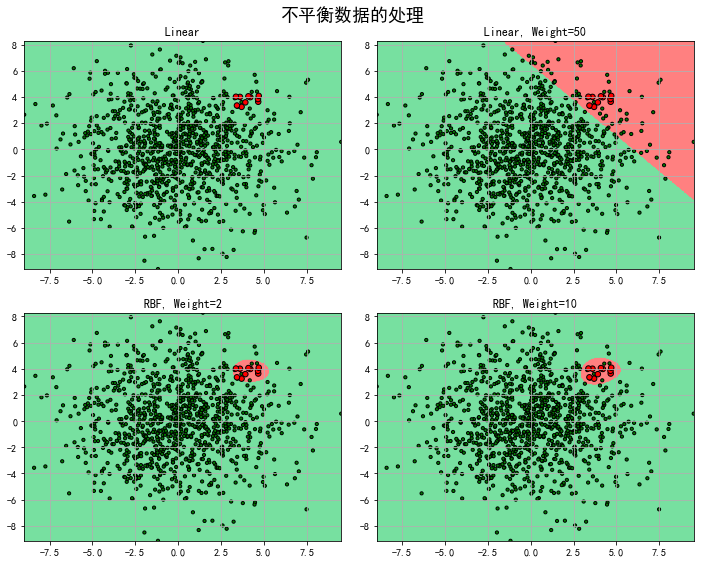

In [2]:
import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.exceptions import UndefinedMetricWarning
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
np.random.seed(0)   # 保持每次生成的数据相同

c1 = 990
c2 = 10
N = c1 + c2
x_c1 = 3*np.random.randn(c1, 2)
x_c2 = 0.5*np.random.randn(c2, 2) + (4, 4)
x = np.vstack((x_c1, x_c2))
y = np.ones(N)
y[:c1] = -1

# 显示大小
s = np.ones(N) * 30
s[:c1] = 10

# 分类器
clfs = [svm.SVC(C=1, kernel='linear'),
        svm.SVC(C=1, kernel='linear', class_weight={-1: 1, 1: 50}),
        svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 2}),
        svm.SVC(C=0.8, kernel='rbf', gamma=0.5, class_weight={-1: 1, 1: 10})]
titles = 'Linear', 'Linear, Weight=50', 'RBF, Weight=2', 'RBF, Weight=10'

x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 8), facecolor='w')
for i, clf in enumerate(clfs):
    clf.fit(x, y)

    y_hat = clf.predict(x)
    # show_accuracy(y_hat, y) # 正确率
    # show_recall(y, y_hat)   # 召回率

    # 画图
    plt.subplot(2, 2, i+1)
    grid_hat = clf.predict(grid_test)       # 预测分类值
    grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=s, cmap=cm_dark)      # 样本的显示
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(titles[i])
    plt.grid()
plt.suptitle(u'不平衡数据的处理', fontsize=18)
plt.tight_layout(1.5)
plt.subplots_adjust(top=0.92)